#PROBLEMA 4


In [2]:
""" imports utilizados """
import numpy as np
import time
from PIL import Image
import matplotlib.pyplot as plt
from IPython import display

In [3]:
""" funcion para verificar shape de salida """
def output_shape(size, kernel, padding, stride):
    output = ((size - kernel + (2 * padding)) / stride) + 1
    return output

In [4]:
""" convolucion general """
def convolution(image, kernel):

    h, w, c = image.shape
    zeros_data = np.zeros(shape=(225, 225, 3))

    for z in range (0, c):
        for u in range (0, h-3+1):
            for v in range (0, w-3+1):
                conv_init = image[u:u+3, v:v+3, z]
                conv = np.sum(conv_init*kernel)
                zeros_data[u,v,z] = conv
            if (u % 30) == 0:
                plt.imshow(zeros_data)
                display.clear_output(wait=True)
                plt.title('convolution progress graph')
                plt.show()
                time.sleep(0.01)
    
    return zeros_data

In [5]:
image = Image.open("sample.jpeg")
resize_image = image.resize((227, 227))
image_np = np.asarray(resize_image) / 255.0

codigo principal

In [6]:
#validar shape esperado de salida
print(output_shape(227, 3, 0, 1))

225.0


In [7]:
#kernel de SOBEL vertical
kernel_1 = np.array([[-1, -2, -1], [0 , 0 , 0], [1 , 2 , 1]])
#kernel de SOBEL Horizontal
kernel_2 = np.array([[-1, 0, 1], [-1 , 0 , 1], [-1 , 0 , 1]])
#Kernel laplaciano
kernel_3 = np.array([[-1, -1, -1], [-1 , 8 , -1], [-1 , -1 , -1]])

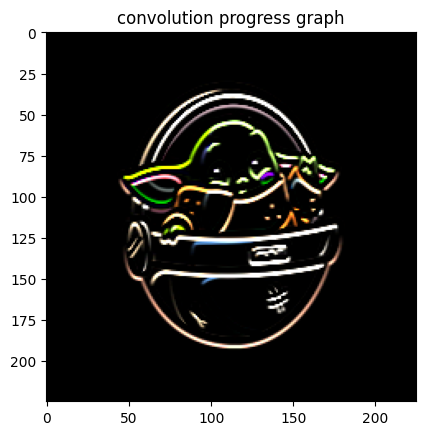

In [8]:
#operacion convolucion
sample_conv_k1 = convolution(image_np, kernel_1)

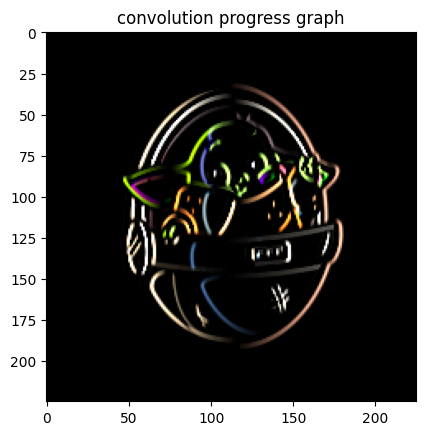

In [9]:
sample_conv_k2 = convolution(image_np, kernel_2)

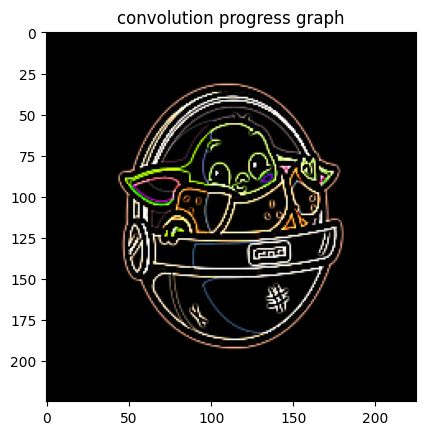

In [10]:
sample_conv_k3 = convolution(image_np, kernel_3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


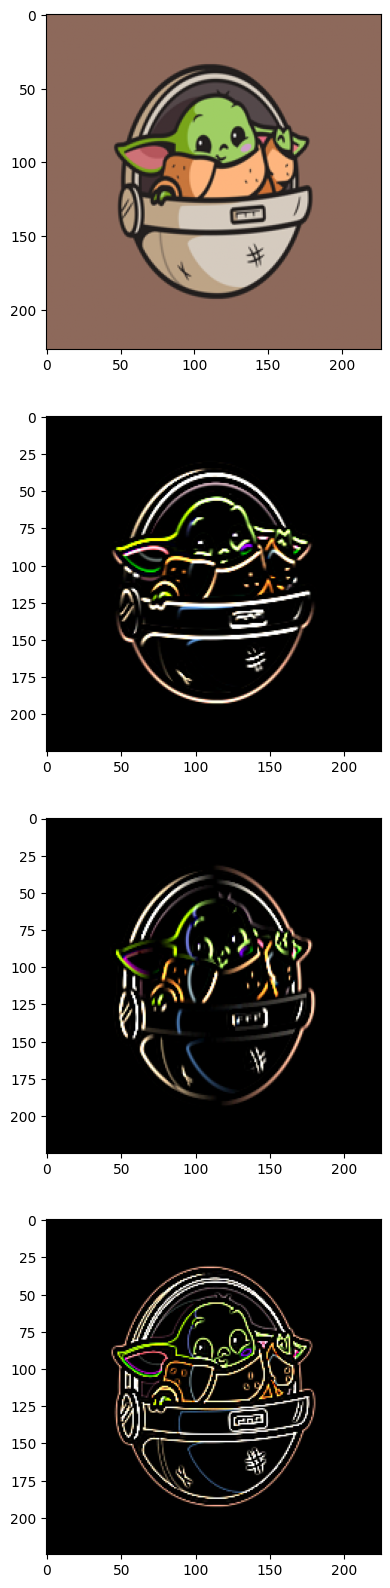

In [11]:

fig, axes = plt.subplots(4,1, figsize=(20,20))

axes[0].imshow(image_np)
axes[1].imshow(sample_conv_k1)
axes[2].imshow(sample_conv_k2)
axes[3].imshow(sample_conv_k3)


plt.show()

#PROBLEMA 7

In [36]:
x = np.random.randint(0, 101, 10000)
len(x)

10000

In [31]:
#Yn = ((1 - a)(y(n - 1)) + (a)(xn))
#filtro recursivo
def recursive_filter(X, Y_ant, alpha):
    Y = ((1 - alpha)*Y_ant) + ((alpha)*X)
    return Y

In [51]:
""" main """
alpha = [0.1, 0.5, 0.9]
output_alpha_1 = np.zeros(shape=(10000))
output_alpha_2 = np.zeros(shape=(10000))
output_alpha_3 = np.zeros(shape=(10000))

In [52]:
for i in range(0, len(alpha)):
    for j in range(0,len(x)):
        if j == 0:
            Y_ant = 0;
        
        Y_act = recursive_filter(X=x[j], Y_ant=Y_ant, alpha=alpha[i])
        Y_ant = Y_act
        
        if i == 0:
            output_alpha_1[j] = Y_act
        if i == 1: 
            output_alpha_2[j] = Y_act
        if i == 2:
            output_alpha_3[j] = Y_act

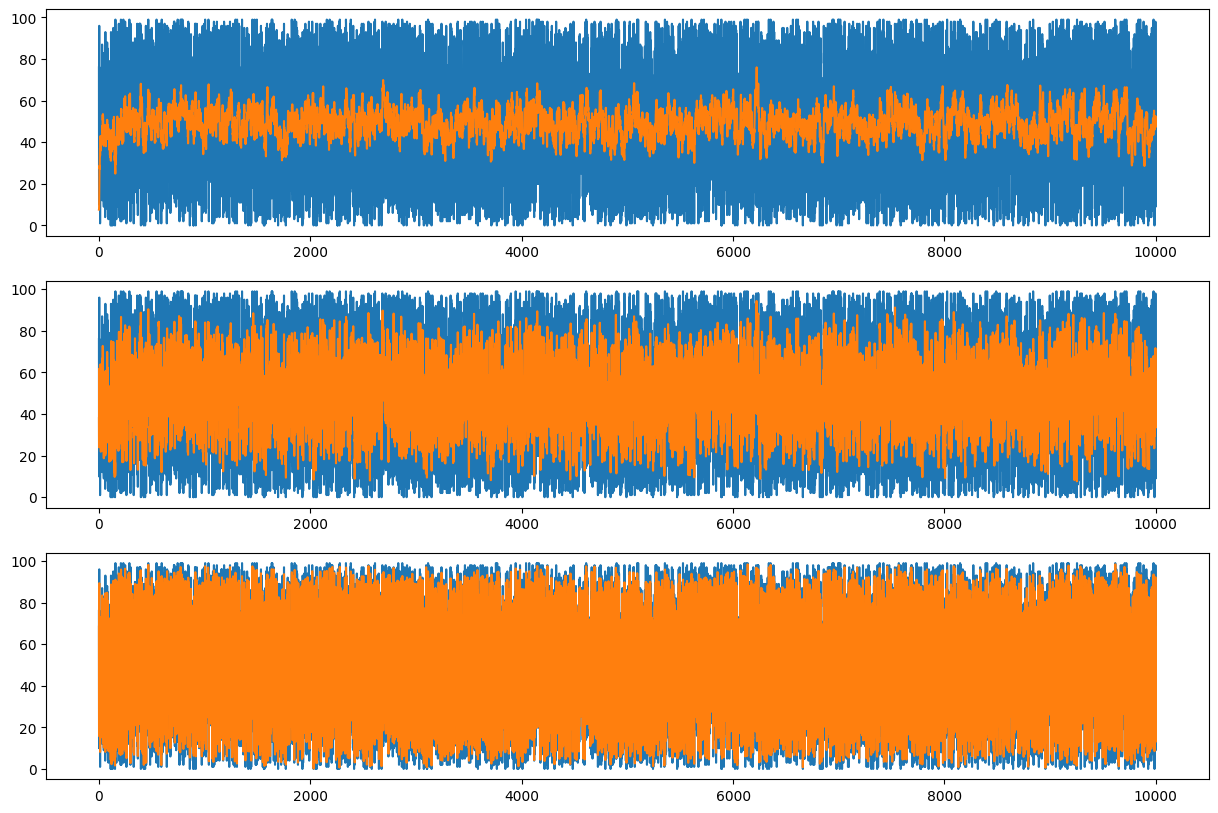

In [67]:

fig, axes = plt.subplots(3,1, figsize=(15,10))

axes[0].plot(x)
axes[0].plot(output_alpha_1)
axes[1].plot(x)
axes[1].plot(output_alpha_2)
axes[2].plot(x)
axes[2].plot(output_alpha_3)
